In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Adding Momentum to GD/SGD

Let's apply Gradient Descent to the function

$$f(x,y) = \frac{1}{2}(x^2+by^2), \quad p\in(0,1). $$

In [2]:
def naughty_f(x,y):
    p = 0.1
    return 0.5*(x**2+p*y**2)

The Gradient of $f(x,y)$ is given by

$$
\nabla f(x,y) = 
\begin{bmatrix} 
    x \\
    py
\end{bmatrix}
$$

In [3]:
def naughty_gradient(x,y):
    p = 0.1
    return np.array([x,p*y])

In [4]:
'test naughty_f and naughty_gradient'
x,y = 1,1
print(naughty_f(x,y))
print(naughty_gradient(x,y))

0.55
[1.  0.1]


The minimum value of $f$ is zero. 
That minimum is reached at the point $(0,0)$.

In [5]:
'function for plotting level curves of naughty_f'
def naughty_contour(a,b,level,mesh_size=1000):
    xlist = np.linspace(a, b, mesh_size)
    ylist = np.linspace(a, b, mesh_size)
    X, Y = np.meshgrid(xlist, ylist)
    Z = naughty_f(X,Y)
    plt.contour(X,Y,Z,level)

Text(0.5,1,'level curve f(x,y)=0.3')

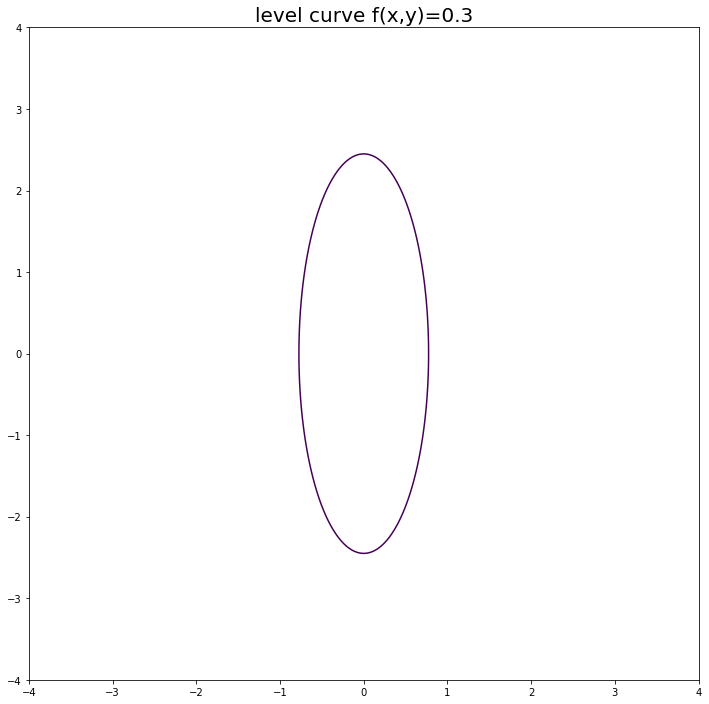

In [6]:
'test naughty_contour'
plt.figure(figsize = (12,12))
naughty_contour(-4,4,0.3)
plt.title('level curve f(x,y)=0.3',fontsize=20)

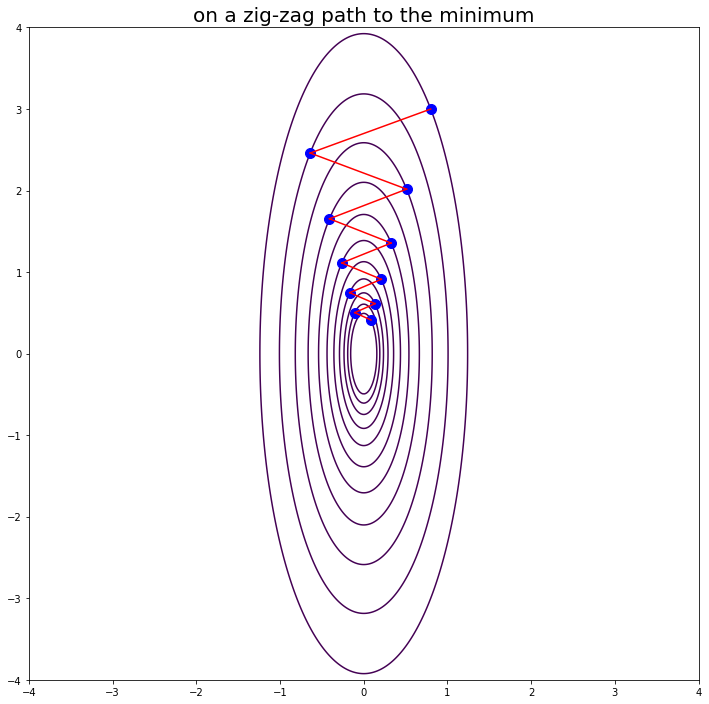

In [7]:
'Gradient Descent'
plt.figure(figsize = (12,12))
plt.title('on a zig-zag path to the minimum',fontsize = 20)

s = 1.8 #learning rate

x = np.array([0.8,3]) #initial point (0.8,3)
plt.plot(x[0],x[1],'bo',MarkerSize=10)
z = naughty_f(x[0],x[1])
naughty_contour(-4,4,z)

it = 10 #number of GD iterations
for i in range(it): 
    new_x = x-s*naughty_gradient(x[0],x[1])
    plt.plot(new_x[0],new_x[1],'bo',MarkerSize=10)
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r-')
    
    
    x = new_x
    z = naughty_f(x[0],x[1])
    naughty_contour(-4,4,z)
    

The slow ziz-zag path is a real problem. We have to improve it.

Key idea: add momentum, i.e., the direction of the new step remembers the previous direction:

$$
x_i = x_{i-1}+d_i, \quad \mbox{where} \quad d_i = -s\nabla f(x_i)+\beta \, d_{i-1}
$$

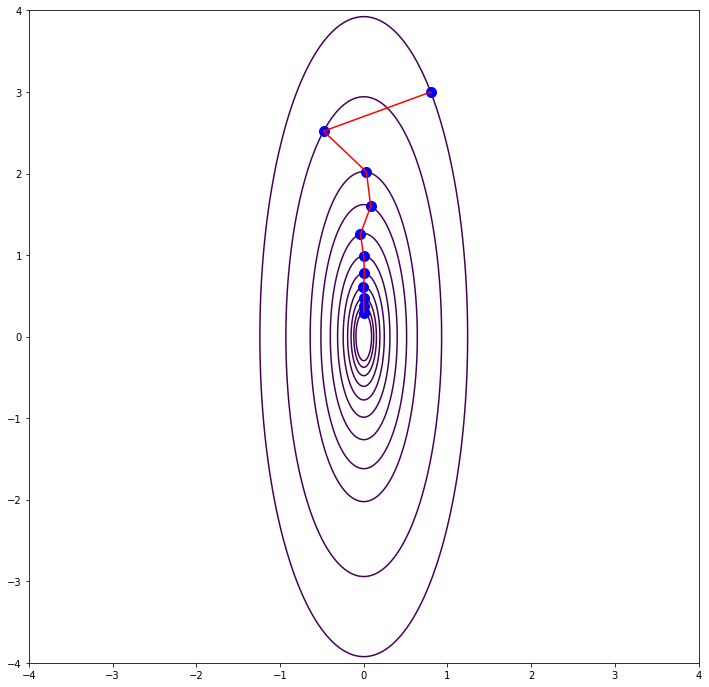

In [8]:
'Gradient Descent with Momentum'
plt.figure(figsize = (12,12))

beta = 0.2 #momentum parameter
s = 1.6 #learning rate


x = np.array([0.8,3]) #initial point (0.8,3)
plt.plot(x[0],x[1],'bo',MarkerSize=10)
z = naughty_f(x[0],x[1])
naughty_contour(-4,4,z)

d_current = np.zeros(2)
d_previous = np.zeros(2)

it = 10 #number of GD iterations
for i in range(it): #
    
    d_current = -s*naughty_gradient(x[0],x[1]) + beta*d_previous
    
    new_x = x+d_current
    plt.plot(new_x[0],new_x[1],'bo',MarkerSize=10)
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r-')
    
    
    x = new_x
    z = naughty_f(x[0],x[1])
    naughty_contour(-4,4,z)
    d_previous = d_current